Question 1

(a) Using these data and Matthiessen's rule, determine the temperature coefficient of resistivity (TCR) for these Cu-Sn alloys.

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
data_file_name = "Cu-Sn-alloy-properties.txt"

In [34]:
#load text and calculate x*(1-x)
data = np.loadtxt(data_file_name)
Rho = data[:, 3]
x = data[:, 2]
y=x*(1-x)
kappa = data[:, 5]
sigma = data[:, 4]*10**6
T = 300

In [35]:
#do linear regression and calculate c
regr = linear_model.LinearRegression()
regr.fit(y.reshape(-1, 1), Rho)
C, b = regr.coef_, regr.intercept_

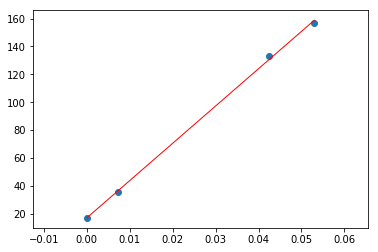

In [36]:
#plot figure
plt.figure()
plt.scatter(y,Rho)
plt.plot(y, regr.predict(y.reshape(-1,1)), color='red', linewidth=1)

In [37]:
print("TCR="+str(C))

TCR=[2671.86073881]


（b）Based on your regression for part (a), what is the resistivity of pure copper? What should be the resistivity of an alloy containing 3 atomic % Sn (X=0.03)?

In [38]:
print("resistivity of pure copper is "+str(b)+" nOhm m")

resistivity of pure copper is 17.164385477312578 nOhm m


In [39]:
print("resistivity of an alloy containing 3 atomic % Sn is"+str(C*0.03*(1-0.03)+b)+" nOhm m")

resistivity of an alloy containing 3 atomic % Sn is[94.91553298] nOhm m


(c) The Wiedemann-Franz law says thermal conductivity and electrical conductivity are related by kappa/sigma = CWFT. Plot this relation and determine the constant CWF in units of W Ω K-2.

In [40]:
regr.fit(sigma.reshape(-1, 1), kappa)
k, b1 = regr.coef_, regr.intercept_
CWF = k/T
print(CWF)

[2.17578361e-08]


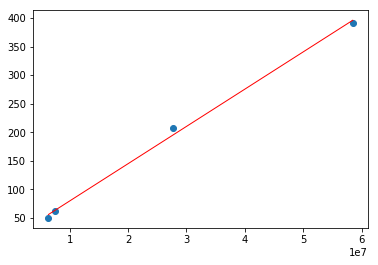

In [44]:
#plot figure
plt.figure()
plt.scatter(sigma,kappa)
x = np.linspace(min(sigma),max(sigma),100)
y = k*x+b1
plt.plot(x, y, color='red', linewidth=1)

Question 1

Using only the data from the MD calculation, recalculate the constant CWF? Does this agree with the result of problem 1? If no then what are the likely causes for differences, and if yes then explain why MD is sufficient?

In [117]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
data_file_name = "505exam1-2.txt"

data = np.loadtxt(data_file_name)
kappa = data[:, 1]
sigma = data[:, 0]*10**6

In [118]:
regr.fit(sigma.reshape(-1, 1), kappa)
k, b1 = regr.coef_, regr.intercept_
CWF = k/T
print(CWF)

[6.57899518e-09]


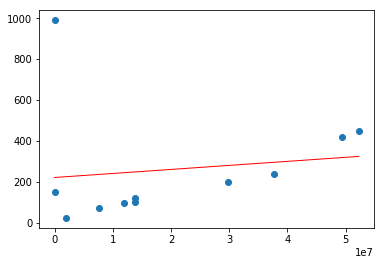

In [119]:
#plot figure
plt.figure()
plt.scatter(sigma,kappa)
x = np.linspace(min(sigma),max(sigma),100)
y = k*x+b1
plt.plot(x, y, color='red', linewidth=1)

It do not fit well because some of the data, so some of the data should be dropped. 

In [120]:
sigma = np.delete(sigma,(1,10))
kappa = np.delete(kappa,(1,10))
regr.fit(sigma.reshape(-1, 1), kappa)
k, b1 = regr.coef_, regr.intercept_
CWF = k/T
print(CWF)

[2.67950032e-08]


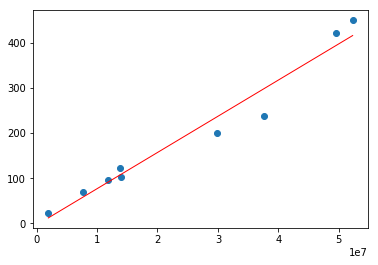

In [121]:
#plot figure
plt.figure()
plt.scatter(sigma,kappa)
x = np.linspace(min(sigma),max(sigma),100)
y = k*x+b1
plt.plot(x, y, color='red', linewidth=1)

(b) What relationships do you identify between the chemistry and the trend with conductivity, ie. what about chemistry shows noticeable impact on model results? 
 


The position of element in the periodic table has great impact on the trend with conductivity.
alkali and alkali-earth metal on the left end are moderately good conductors, the ones in the middle (the transition metals) are moderate to very good conductors, and the elements on the right are very poor conductors.

(C)Using the data for Cu and Sn, predict the thermal and electrical conductivities of the compositions from problem 1. What are possible explanations for any deviations from the
experimental data, and if there are no deviations then why is MD able to correctly model the property values?

In [122]:
sigma_Cu = data[6,0]*10**6
kappa_Cu = data[6,1]
sigma_Sn = data[0,0]*10**6
kappa_Sn = data[9,1]


In [123]:
sigma1 = np.hstack((sigma_Cu,sigma_Sn))
kappa1 = np.hstack((kappa_Cu,kappa_Sn))

In [124]:
regr.fit(sigma1.reshape(-1, 1), kappa1)
k1, b1 = regr.coef_, regr.intercept_
CWF = k1/T
print(CWF)

[9.94561523e-08]


In [125]:
data_file_name = "Cu-Sn-alloy-properties.txt"
data = np.loadtxt(data_file_name)
kappa_exp = data[:, 5]
sigma_exp = data[:, 4]*10**6

kappa_predict = k1*sigma_exp + b1

In [126]:
print('The prediction data of kappa is', kappa_predict) 
print('The experiment data of kappa is', kappa_exp) 
print( 'The error between experiment data and prediction data is ', kappa_predict-kappa_exp) 


The prediction data of kappa is [ 689.92568965 -226.11780665 -830.58189644 -864.87547773]
The experiment data of kappa is [391. 208.  62.  50.]
The error between experiment data and prediction data is  [ 298.92568965 -434.11780665 -892.58189644 -914.87547773]


Question 3

(a) Using the code developed in homework 3, estimate the lattice parameter and energy for an Ar-Cu system in the fcc-like and the bcc-like structure for 25% and 50% of Ar (assume solid solution and 0 K conditions).

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def fccsuml(a,nc,rc): # input a = lattice parameter, nc = number of unit cells summed over
    n=4 #number of atoms in unit cell 
    r = np.array([(0,0,0),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5)]) # unit cell positions
    ucell=0 # initialize energy 
    for k in range (-nc,nc): # sum over unit cells in x direction 
        for l in range (-nc,nc): # sum over unit cells in y direction 
            for m in range (-nc,nc): # sum over unit cells in z direction
                for i in range (n): # sum over atoms in the unit cell 
                    for j in range (n): # sum over atoms in the unit cell 
                        # dist = distance between atoms 
                        dist = a*np.sqrt((k+r[j,0]-r[i,0])**2+(l+r[j,1]-r[i,1])**2+(m+r[j,2]-r[i,2])**2)
                        if dist>0 and dist <= rc:
                            if i == 0 and j == 0:
                                u = 2*4*epsilon_Ar*((sigma_Ar/dist)**12-(sigma_Ar/dist)**6)
                            elif i == 0 and j == 1:
                                u = 2*4*epsilon_ArCu*((sigma_ArCu/dist)**12-(sigma_ArCu/dist)**6)
                            else:
                                u = 2*4*epsilon_Cu*((sigma_Cu/dist)**12-(sigma_Cu/dist)**6)
                        else: 
                            u=0
                        ucell = ucell + u #sum the energy 
    ucell=ucell/n # output energy per atom 
    return ucell # output: ucell = energy per atom

In [78]:
def bccsuml(a,nc,rc): # input a = lattice parameter, nc = number of unit cells summed over
    n = 2 #number of atoms in unit cell 
    r = np.array([(0,0,0),(0.5,0.5,0.5)]) # unit cell positions
    ucell=0 # initialize energy 
    for k in range (-nc,nc): # sum over unit cells in x direction 
        for l in range (-nc,nc): # sum over unit cells in y direction 
            for m in range (-nc,nc): # sum over unit cells in z direction
                for i in range (n): # sum over atoms in the unit cell 
                    for j in range (n): # sum over atoms in the unit cell 
                        # dist = distance between atoms 
                        dist = a*np.sqrt((k+r[j,0]-r[i,0])**2+(l+r[j,1]-r[i,1])**2+(m+r[j,2]-r[i,2])**2)
                        if dist>0 and dist <= rc:
                            #make sure distance is nonzero 
                            if i == 0 and j == 0:
                                u = 2*4*epsilon_Ar*((sigma_Ar/dist)**12-(sigma_Ar/dist)**6)
                            elif i == 1 and j == 1:
                                u = 2*4*epsilon_Cu*((sigma_Cu/dist)**12-(sigma_Cu/dist)**6)
                            else:
                                u = 2*4*epsilon_ArCu*((sigma_ArCu/dist)**12-(sigma_ArCu/dist)**6)
                        else: 
                            u=0
                        ucell = ucell + u #sum the energy 
    ucell=ucell/n # output energy per atom 
    return ucell # output: ucell = energy per atom

In [79]:
a_s=[]
u0fcc = []
u0bcc = []

KB = 1.38e-23
sigma_Ar = 0.341
epsilon_Ar = 119.8*KB
sigma_Cu = 0.227
epsilon_Cu = 6765.4*KB
sigma_ArCu = np.sqrt(sigma_Ar*sigma_Cu)
epsilon_ArCu = np.sqrt(epsilon_Ar*epsilon_Cu)

In [80]:
a = 0.3
for i in range(201):
    u0fcc.append(fccsuml(a,4, 5))
    u0bcc.append(bccsuml(a,4, 5))
    a_s.append(a)
    a=a+0.002

In [87]:
a_min = u0fcc.index(min(u0fcc))
a = 0.3+0.002*a_min
b = fccsuml(a,4, 5)
print("afcc_min="+str(a),"u0fcc_min="+str(b)+"J")

afcc_min=0.356 u0fcc_min=-2.7249412639503464e-18J


In [88]:
a_min = u0bcc.index(min(u0bcc))
a = 0.3+0.002*a_min
b = bccsuml(a,4, 5)
print("abcc_min="+str(a),"u0bcc_min="+str(b)+"J")

abcc_min=0.33799999999999997 u0bcc_min=-4.836268801017498e-19J


Text(0.5,1,'energy at the equilibrium vs cutoff distance (FCC)')

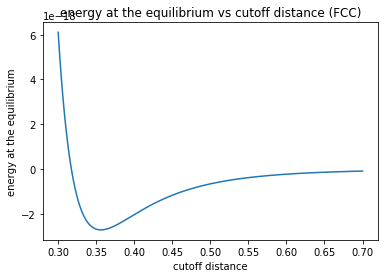

In [89]:
plt.figure()
plt.plot(a_s,u0fcc)
plt.xlabel('cutoff distance')
plt.ylabel('energy at the equilibrium')
plt.title('energy at the equilibrium vs cutoff distance (FCC)')

Text(0.5,1,'energy at the equilibrium vs cutoff distance (BCC)')

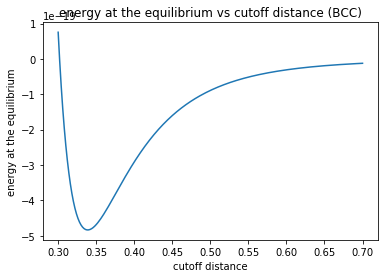

In [90]:
plt.figure()
plt.plot(a_s, u0bcc)
plt.xlabel('cutoff distance')
plt.ylabel('energy at the equilibrium')
plt.title('energy at the equilibrium vs cutoff distance (BCC)')

(b) What modifications would be necessary in order to perform these calculations at non-zero temperatures.

Since the temperature is non-zero, the atoms can move. As a result, calculation of motion, momenta and kinetic energy should be added in the solution. 

Question 4

(a) How far from the original starting point on average is an atom after 1,000 jumps in a BCC lattice?

In [94]:
import random 
import numpy as np 
from matplotlib import mlab 
import matplotlib.pyplot as plt

In [95]:
times = 500
steps = 1000

x =np.zeros(times)
# start particle at the origin 
y=np.zeros(times)
z=np.zeros(times)
r2s=np.zeros(steps)
sig=np.zeros(steps)

delx = [0.5,0.5,0.5,0.5,-0.5,-0.5,-0.5,-0.5,0.5,0.5,0.5,0.5]
dely = [0.5,0.5,-0.5,-0.5,0.5,0.5,-0.5,-0.5,0.5,0.5,-0.5,-0.5]
delz = [0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5]
ds = 0

In [96]:
for i in range(times):
    for m in range(steps): 
         # difine a list of random jump
        fd = random.randint(0,11)
        x[i] =  x[i] + delx[fd]
        y[i] =  y[i] + dely[fd]
        z[i] =  z[i] + delz[fd]
        r2 = x[i]**2+y[i]**2+z[i]**2
        r2s[m] = r2s[m] + r2
        sig[m] = sig[m] + r2**2
    distance = np.sqrt(x[i]**2+y[i]**2+z[i]**2)
    ds = ds+distance

for m in range(steps):
    r2s[m] = r2s[m]/times
    sig[m] = (sig[m]/times-r2s[m]**2)/r2s[m]**2
     
av_ds = ds/times

print("av_ds="+str(av_ds))

av_ds=167.5932111148253


(b) Provide the graphs of mean square displacement and standard deviation versus number of jumps. Are there any significant differences between what we saw in the case with unbiased motion.

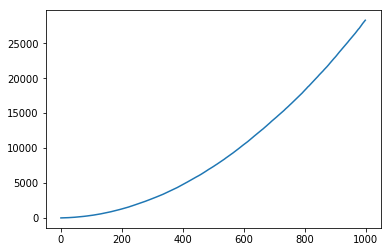

In [97]:
plt.figure()
plt.plot(r2s)
plt.savefig('r2s')

The mean square displacement is not linear in n, but it is linear in unbiased motion. 

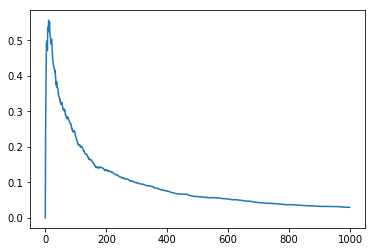

In [99]:
plt.figure()
plt.plot(sig)
plt.savefig('sig')

The standard deviation is close to zero, however it is close to one in unbiased motion. 